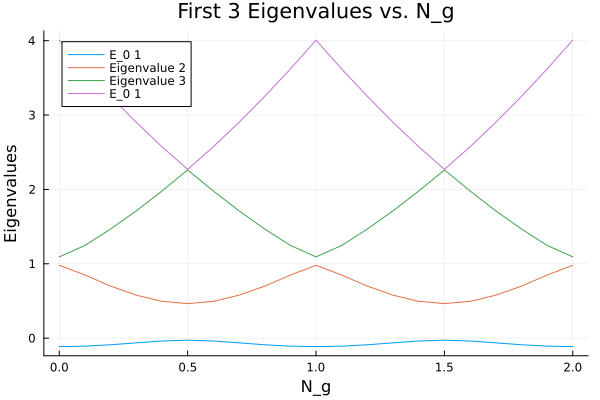

In [4]:
using LinearAlgebra
using Plots

# Definir parámetros
E_C = 1.0       # Energía de carga
E_0 = 0.5       # Energía de acoplamiento
N_max = 5       # Número máximo de estados de carga

# Rango de N_g
N_g_values = 0:0.1:2   # Podemos ajustar el rango y el paso según sea necesario

# Para almacenar los autovalores
eigenvalues_all = []

# Función para calcular el Hamiltoniano
function hamiltonian(N_g, E_C, E_0, N_max)
    dim = 2 * N_max + 1
    H = zeros(dim, dim)

    for N in -N_max:N_max
        i = N + N_max + 1
        H[i, i] = E_C * (N - N_g)^2

        if i < dim
            H[i, i+1] = -0.5 * E_0
        end
        if i > 1
            H[i, i-1] = -0.5 * E_0
        end
    end
    
    return H
end

# Calcular los autovalores para cada valor de N_g
for N_g in N_g_values
    H = hamiltonian(N_g, E_C, E_0, N_max)
    eigenvalues, _ = eigen(H)
    push!(eigenvalues_all, eigenvalues[1:4])  # Solo los primeros tres autovalores
end

# Convertir la lista de autovalores en una matriz para facilitar el plotting
eigenvalues_all = hcat(eigenvalues_all...)

# Plotear los primeros tres autovalores vs. N_g
plot(N_g_values, eigenvalues_all', xlabel="N_g", ylabel="Eigenvalues", title="First 3 Eigenvalues vs. N_g", label=["E_0 1" "Eigenvalue 2" "Eigenvalue 3" ])


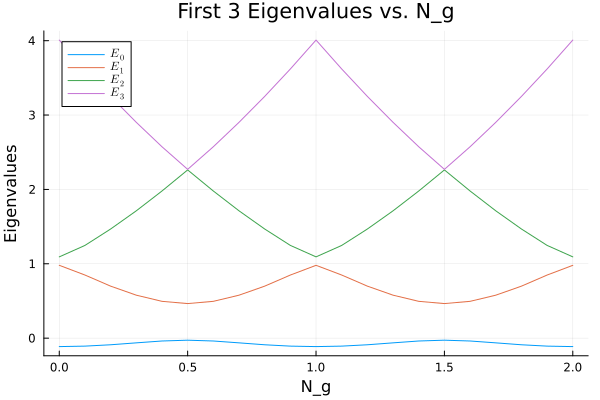

In [8]:
using LaTeXStrings
plot(N_g_values, eigenvalues_all', xlabel="N_g", ylabel="Eigenvalues", title="First 3 Eigenvalues vs. N_g", label=[L"E_0" L"E_1" L"E_2" L"E_3" ])
